## CLEAN THE DATA SET

Environment Used: 
NYU HPC Cluster with
MemTotal:       123658260 kB memory
10GB of disk space (Less than 2 GB utilized)
Operating System : 
	Distributor ID: Debian
Description:    Debian GNU/Linux 10 (buster)
Release:        10
Codename:       buster

If you want to do this locally you will need to downlaod the dataset from
https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/rs6k-p7g6
Save the dataset you will need to remeber the path to read into a pandas data frame.

If you use dataproc upload the datset from your computer to dataproc and in your home directory using the following command

SMALL TRANSFERS:
You can add smaller files to HDFS by copying them to your local filesystem / non-HDFS  home directory and then copying them from there to HDFS.  Note that there is a limit on the size of your local filesystem home directory, so you should only perform these steps for smaller amounts of data- for larger datasets you should use the method described in the Large Transfers section.

Navigate to the command line interface by going to http://dataproc.hpc.nyu.edu/ssh.

In the upper right portion of the header banner, select Upload File.  Use the web browser dialog to select your file.
Once the file is uploaded to your Unix directory, run the following command to copy it into HDFS:

hdfs dfs -put /home/<your_netid>_nyu_edu/<path_to_file> <hdfs_path>

To retrieve data from HDFS and copy it to your local filesystem home directory, you can use one of the following commands:

hdfs dfs -get <hdfs_path> /home/<your_netid>_nyu_edu/<path_to_file>

LARGE TRANSFERS:
To upload large datasets to HDFS, first navigate to the data ingest website at https://dataproc.hpc.nyu.edu/ingest. The data ingest website provides a web interface for temporary cloud-based bucket storage.  Any datasets that are uploaded to the data ingest website will remain there for 2 days.  Before these 2 days have elapsed, you will need to upload your datasets to your HDFS home directory.  To do that you can use the following command after logging in:

hadoop distcp gs://nyu-dataproc-hdfs-ingest/<file_or_folder_name> /user/<your_net_id>_nyu_edu

READ IN THE DATA FROM YOUR LOCAL COMPUTER INTO A PANDAS DATA FRAME. INSERT THE PATH WHERE THE DATASET IS STORED ON YOUR COMPUTER. 

In [1]:
import os
import time
start_time = time.time()
print(start_time)

1683930759.3566287


In [48]:
data_dir = 'data'
results_dir = 'results'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

In [2]:

data_path = os.path.join(data_dir, 'DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

# read data
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv(data_path)

df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,41283963,PAPA JOHN'S,Brooklyn,5804,5 AVENUE,11220.0,7189217272,Pizza,01/26/2022,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,01/26/2022,04/14/2023,Cycle Inspection / Re-inspection,40.640526,-74.015090,307.0,38.0,7400.0,3397962.0,3.008550e+09,BK32,NaN,NaN,NaN,NaN,NaN,NaN
1,50133127,NaN,Queens,19005,HILLSIDE AVE,11423.0,9176797448,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,04/14/2023,NaN,40.715737,-73.771779,408.0,23.0,47800.0,4223678.0,4.104990e+09,QN06,NaN,NaN,NaN,NaN,NaN,NaN
2,50113539,MackaTree,Brooklyn,417,MARCUS GARVEY BOULEVARD,11216.0,3476792021,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,04/14/2023,NaN,40.682815,-73.937999,303.0,36.0,27500.0,3046354.0,3.016640e+09,BK35,NaN,NaN,NaN,NaN,NaN,NaN
3,50059874,GINZA SUSHI,Brooklyn,2809,OCEAN AVENUE,11229.0,7187696028,Japanese,12/27/2022,Violations were cited in the following area(s).,04M,Live roaches in facility's food or non-food area.,Critical,21.0,B,12/27/2022,04/14/2023,Cycle Inspection / Re-inspection,40.593102,-73.950210,315.0,48.0,59401.0,3202166.0,3.074050e+09,BK17,NaN,NaN,NaN,NaN,NaN,NaN
4,50131148,NaN,Bronx,969,PROSPECT AVE,10459.0,6466833982,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,04/14/2023,NaN,40.822922,-73.900281,203.0,17.0,12901.0,2098575.0,2.026780e+09,BX33,NaN,NaN,NaN,NaN,NaN,NaN


Check what fraction of rows are null for each column.


In [3]:
null_stats = df.isna().astype(int).describe()
print(null_stats.loc['mean', :])

CAMIS                     0.000000
DBA                       0.008443
BORO                      0.000000
BUILDING                  0.001956
STREET                    0.000132
ZIPCODE                   0.013753
PHONE                     0.000054
CUISINE DESCRIPTION       0.021255
INSPECTION DATE           0.000000
ACTION                    0.021255
VIOLATION CODE            0.027051
VIOLATION DESCRIPTION     0.027051
CRITICAL FLAG             0.000000
SCORE                     0.053488
GRADE                     0.504984
GRADE DATE                0.540296
RECORD DATE               0.000000
INSPECTION TYPE           0.021255
Latitude                  0.001540
Longitude                 0.001540
Community Board           0.016769
Council District          0.016769
Census Tract              0.016769
BIN                       0.022020
BBL                       0.003148
NTA                       0.016769
Location Point1           1.000000
Zip Codes                 1.000000
Community Districts 

Drop columns which contain at least 50% null values

In [4]:
# drop columns which contain at least 50% null values
drop_columns = []
for col in null_stats.columns:
    if null_stats.loc['mean', col] >= 0.5:
        print(col, null_stats.loc['mean', col])
        drop_columns.append(col)

df.drop(columns = drop_columns, inplace=True)
df.describe()

GRADE 0.5049840402841859
GRADE DATE 0.5402964437536467
Location Point1 1.0
Zip Codes 1.0
Community Districts 1.0
Borough Boundaries 1.0
City Council Districts 1.0
Police Precincts 1.0


,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,2.039510e+05,201146.000000,193042.000000,203637.000000,203637.000000,200531.000000,200531.000000,200531.000000,1.994600e+05,2.033090e+05
mean,4.726189e+07,10701.716494,21.952316,40.172066,-72.932447,252.679516,20.575527,29878.452658,2.554362e+06,2.441907e+09
std,4.147896e+06,593.847106,16.992658,4.724882,8.577463,129.608585,15.775838,31372.564573,1.340449e+06,1.332931e+09
min,3.007544e+07,8512.000000,0.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,4.159531e+07,10023.000000,11.000000,40.683423,-73.988909,106.000000,4.000000,7900.000000,1.049985e+06,1.010640e+09
50%,5.005502e+07,11101.000000,18.000000,40.730754,-73.956289,302.000000,20.000000,17300.000000,3.016610e+06,3.006000e+09
75%,5.009823e+07,11230.000000,29.000000,40.761606,-73.896112,401.000000,34.000000,42200.000000,4.003516e+06,4.002340e+09
max,5.013498e+07,14228.000000,157.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


Check null stats for remaining columns

In [5]:
df.isna().astype(int).describe().loc['mean', :]

CAMIS                    0.000000
DBA                      0.008443
BORO                     0.000000
BUILDING                 0.001956
STREET                   0.000132
ZIPCODE                  0.013753
PHONE                    0.000054
CUISINE DESCRIPTION      0.021255
INSPECTION DATE          0.000000
ACTION                   0.021255
VIOLATION CODE           0.027051
VIOLATION DESCRIPTION    0.027051
CRITICAL FLAG            0.000000
SCORE                    0.053488
RECORD DATE              0.000000
INSPECTION TYPE          0.021255
Latitude                 0.001540
Longitude                0.001540
Community Board          0.016769
Council District         0.016769
Census Tract             0.016769
BIN                      0.022020
BBL                      0.003148
NTA                      0.016769
Name: mean, dtype: float64

 Discard columns that are not required for the analysis

In [6]:

df.drop(columns = ['BUILDING', 'STREET', 'RECORD DATE', 'Community Board', 'Council District', 'Census Tract', 'NTA'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203951 entries, 0 to 203950
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  203951 non-null  int64  
 1   DBA                    202229 non-null  object 
 2   BORO                   203951 non-null  object 
 3   ZIPCODE                201146 non-null  float64
 4   PHONE                  203940 non-null  object 
 5   CUISINE DESCRIPTION    199616 non-null  object 
 6   INSPECTION DATE        203951 non-null  object 
 7   ACTION                 199616 non-null  object 
 8   VIOLATION CODE         198434 non-null  object 
 9   VIOLATION DESCRIPTION  198434 non-null  object 
 10  CRITICAL FLAG          203951 non-null  object 
 11  SCORE                  193042 non-null  float64
 12  INSPECTION TYPE        199616 non-null  object 
 13  Latitude               203637 non-null  float64
 14  Longitude              203637 non-nu

Remove null values in the cusine description column

In [7]:
df = df[df['CUISINE DESCRIPTION'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199616 entries, 0 to 203950
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  199616 non-null  int64  
 1   DBA                    199616 non-null  object 
 2   BORO                   199616 non-null  object 
 3   ZIPCODE                196902 non-null  float64
 4   PHONE                  199607 non-null  object 
 5   CUISINE DESCRIPTION    199616 non-null  object 
 6   INSPECTION DATE        199616 non-null  object 
 7   ACTION                 199616 non-null  object 
 8   VIOLATION CODE         198434 non-null  object 
 9   VIOLATION DESCRIPTION  198434 non-null  object 
 10  CRITICAL FLAG          199616 non-null  object 
 11  SCORE                  193042 non-null  float64
 12  INSPECTION TYPE        199616 non-null  object 
 13  Latitude               199368 non-null  float64
 14  Longitude              199368 non-nu

Check rows which have null zip codes

In [8]:

df[df['ZIPCODE'].isnull()].head(20)

,CAMIS,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,INSPECTION TYPE,Latitude,Longitude,BIN,BBL
61,50105605,LALIBELA ETHIOPIAN RESTAURANT,Manhattan,NaN,9178819775,Ethiopian,11/29/2021,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,45.0,Pre-permit (Operational) / Initial Inspection,0.0,0.0,NaN,1.0
79,41395519,CITI FIELD STAND 321,Queens,NaN,7185958100,American,06/13/2017,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,Cycle Inspection / Initial Inspection,0.0,0.0,NaN,4.0
96,50039447,CHINA HOUSE,Bronx,NaN,7188936187,Chinese,03/09/2019,Violations were cited in the following area(s).,20F,Current letter grade sign not posted.,Not Critical,NaN,Administrative Miscellaneous / Initial Inspection,0.0,0.0,NaN,2.0
170,50068583,RED STAR CHINESE RESTAURANT,Manhattan,NaN,6463355592,Chinese,05/09/2019,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,30.0,Cycle Inspection / Initial Inspection,0.0,0.0,NaN,1.0
287,41395496,"CITI FIELD TWO BOOTS, STAND 318",Queens,NaN,7185958100,American,06/07/2016,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,Cycle Inspection / Initial Inspection,0.0,0.0,NaN,4.0
293,41395505,CITI FIELD NATHAN'S FAMOUS STAND 325,Queens,NaN,7185958100,Hotdogs,06/07/2016,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,Cycle Inspection / Initial Inspection,0.0,0.0,NaN,4.0
321,41423331,CHOP-STICKS RESTAURANT,Bronx,NaN,7182048119,Chinese,04/04/2022,Violations were cited in the following area(s).,09B,Thawing procedures improper.,Not Critical,6.0,Cycle Inspection / Initial Inspection,0.0,0.0,NaN,2.0
338,41203533,GREAT TASTE BAKERY,Manhattan,NaN,6466424110,Bakery Products/Desserts,08/16/2021,Violations were cited in the following area(s).,22F,MISBRANDED AND LABELING,Not Critical,NaN,Administrative Miscellaneous / Initial Inspection,0.0,0.0,NaN,1.0
376,40720858,PIER SIXTY ONE-THE LIGHTHOUSE,Manhattan,NaN,2123366146,American,03/08/2022,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,29.0,Cycle Inspection / Initial Inspection,0.0,0.0,NaN,1.0
459,41203533,GREAT TASTE BAKERY,Manhattan,NaN,6466424110,Bakery Products/Desserts,11/18/2019,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,24.0,Cycle Inspection / Re-inspection,0.0,0.0,NaN,1.0


As the data above doesn't represent a specific sub population we can drop the small number of rows. 
Therefore we will remove null values in the zipcode column

In [9]:

df = df[df['ZIPCODE'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196902 entries, 0 to 203950
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  196902 non-null  int64  
 1   DBA                    196902 non-null  object 
 2   BORO                   196902 non-null  object 
 3   ZIPCODE                196902 non-null  float64
 4   PHONE                  196893 non-null  object 
 5   CUISINE DESCRIPTION    196902 non-null  object 
 6   INSPECTION DATE        196902 non-null  object 
 7   ACTION                 196902 non-null  object 
 8   VIOLATION CODE         195786 non-null  object 
 9   VIOLATION DESCRIPTION  195786 non-null  object 
 10  CRITICAL FLAG          196902 non-null  object 
 11  SCORE                  190413 non-null  float64
 12  INSPECTION TYPE        196902 non-null  object 
 13  Latitude               196654 non-null  float64
 14  Longitude              196654 non-nu

Convert INSPECTION DATE column to datetime

In [10]:

df["INSPECTION DATE"] = pd.to_datetime(df["INSPECTION DATE"])
df['INSPECTION YEAR'] = df['INSPECTION DATE'].dt.year

In [11]:
# find rows where inspection date is < 2016 or  > 2023
df2 = df.groupby(['INSPECTION YEAR'])['INSPECTION YEAR'].count()
df2.sort_values(ascending = False).head(15)

INSPECTION YEAR
2022    91126
2023    31864
2019    29828
2021    21439
2020    16034
2018     3771
2017     2229
2016      582
2015       20
2013        6
2012        2
2011        1
Name: INSPECTION YEAR, dtype: int64

Removing the small fraction of rows which have inspection year <= 2016

In [12]:
df = df[df['INSPECTION YEAR'] > 2016]

Drop duplicate rows

In [13]:
df = df.drop_duplicates()

Counting unique values in CAMIS column: Establishments are uniquely identified by their CAMIS (record ID) number.


In [14]:
print(len(df["CAMIS"].unique()))
print(len(df.index))

23624
196290


Checking for invalid values in BORO column

In [15]:
df['BORO'].unique()

array(['Brooklyn', 'Queens', 'Manhattan', 'Bronx', 'Staten Island', '0'],
      dtype=object)

In [16]:
df2 = df.groupby(['BORO'])['BORO'].count()
df2.sort_values(ascending = False).head(15)

BORO
Manhattan        72789
Brooklyn         52526
Queens           46185
Bronx            18397
Staten Island     6363
0                   30
Name: BORO, dtype: int64

Change 0 to UNKNOWN; value can be inferred from zipcode if required for analysis

In [17]:
df['BORO'] = df['BORO'].replace('0', 'UNKNOWN')

Change column types

In [18]:
df['CAMIS'] = df['CAMIS'].astype(str)
df['ZIPCODE'] = df['ZIPCODE'].astype(int).astype(str)
df['BIN'] = df['BIN'].astype('Int64').astype(str)
df['BBL'] = df['BBL'].astype('Int64').astype(str)

Ensure all zipcodes are of same length - add preceding 0s if required


In [19]:
df['ZIPCODE'].str.len().unique()

array([5])

Ensure violation codes are valid; data sourced from : https://www.nyc.gov/assets/doh/downloads/pdf/about/healthcode/health-code-chapter23.pdf


In [20]:
valid_codes = ['02A','02B','02C','02D','02E','02F','02G','02H','02I','02J','03A','03B','03C','03D','03E','03F','03G','03I','04A','04B','04C','04D','04E','04F','04G','04H','04I','04J','04K','04L','04M','04N','04O','04P','05A','05B','05C','05D','05E','05F','05G','05H','05I','06A','06B','06C','06D','06E','06F','06G','06H','06I','06J','07A','08A','08B','08C','09A','09B','09C','09D','09E','10A','10B','10C','10D','10E','10F','10G','10H','15-01','15-05','15-06','15-07','15-08','15-09','15-13','15-14','15-15','15-16','15-17','15-21','15-22','15-26','15-27','15-28','15-29','15-30','15-31','15-32','15-33','15-34','15-35','15-36','15-37','15-38','15-39','15-40','15-41','15-42','15-48','15-49','15-50','15-51','15-52','15-53','15-54','15-55','15-56','16-01','16-02','16-03','16-04','16-06','16-08','16-09','16-10','16-11','17-01','17-03','18-01','18-02','18-08','18-10','18-11','18-12','18-13','18-14','18-15','18-25','19-01','19-02','19-03','19-04','19-05','19-06','19-07','19-08','19-09','19-10','19-11','20-01','20-02','20-03','20-04','20-05','20-06','20-07','20-08','26-04','28-01','28-02','28-03','28-04','28-05','28-06','28-07','28-09','28-10']
data_codes = set(list(df['VIOLATION CODE'].unique()))
valid_codes_set = set(valid_codes)
data_codes - valid_codes_set
# TODO : remove these rows?

{'10I',
 '10J',
 '15A1',
 '15E2',
 '15E3',
 '15F1',
 '15F2',
 '15F6',
 '15F7',
 '15F8',
 '15I',
 '15L',
 '15S',
 '16A',
 '16B',
 '16C',
 '16D',
 '16E',
 '17A1',
 '18B',
 '18C',
 '18D',
 '18F',
 '18G',
 '20A',
 '20C',
 '20D',
 '20E',
 '20F',
 '22A',
 '22C',
 '22E',
 '22F',
 '22G',
 nan}

Checking that Latitude and Longitude are in a small range around New York

In [21]:

df.loc[:, ['Latitude', 'Longitude']].describe()

,Latitude,Longitude
count,196048.000000,196048.000000
mean,40.727602,-73.941057
std,0.068768,0.075316
min,40.499563,-74.248708
25%,40.685782,-73.989096
50%,40.732205,-73.957162
75%,40.761992,-73.899441
max,40.912822,-73.700928


Save cleaned data

In [22]:
df.to_csv(os.path.join(data_dir, 'DOHMH_New_York_City_Restaurant_Inspection_Results_cleaned.csv'), index = False)




# READ IN PARTIALLY CLEAN DATA BEFORE FINGERPRINT METHOD IS APPLIED

In [23]:
# install spark for running in colab
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [24]:
import findspark
import os
# start spark session

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

findspark.init()

In [25]:
#start spark session
from pyspark import SparkContext, SparkConf
cf = SparkConf()
cf.set("spark.submit.deployMode","client")
sc = SparkContext.getOrCreate(cf)
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()



In [26]:
# read partially clean data to further clean with the finger print method
# data_path = '/user/mz3327_nyu_edu/DOHMH_New_York_City_Restaurant_Inspection_Results_cleaned.csv'
data_path = os.path.join(data_dir, 'DOHMH_New_York_City_Restaurant_Inspection_Results_cleaned.csv')

inspection_df = spark.read.csv(path=data_path, header=True, inferSchema = True)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math

import string, unicodedata
from pyspark.sql import functions as F
from pyspark.sql.functions import count, col, countDistinct, year



In [28]:
def fingerprint(value):
    key = unicodedata.normalize('NFKD', value).encode('ascii','ignore').decode()
    key = set(key.strip().lower().translate(str.maketrans('','',string.punctuation)).split())
    key = ' '.join(sorted(list(key)))
    return (key, value)

def fingerprint_lenient(value):
    key = unicodedata.normalize('NFKD', value).encode('ascii','ignore').decode()
    key = list(key.strip().lower().translate(str.maketrans('','',string.punctuation)).split())
    key = ' '.join(sorted(list(key)))
    return (key, value)

In [29]:
restaurant_rdd = inspection_df.select('DBA').rdd.flatMap(list)
print(restaurant_rdd.take(5))
duplicates = restaurant_rdd.distinct(). \
	map(fingerprint_lenient). \
	groupByKey(). \
	filter(lambda x: len(x[1])>1). \
	mapValues(list). \
	collect()

print(duplicates)

["PAPA JOHN'S", 'GINZA SUSHI', 'XIN HUO BAN', 'MARC FORGIONE', 'PUEBLA PUEBLA BAR RESTAURANT']
[('johns papa', ["PAPA JOHN'S", 'PAPA JOHNS']), ('ginza sushi', ['GINZA SUSHI', 'SUSHI GINZA']), ('johns papa pizza', ["PAPA JOHN'S PIZZA", 'PAPA JOHNS PIZZA']), ('la patrona', ['La Patrona', 'LA PATRONA']), ('fairfield inn suites', ['FAIRFIELD INN & SUITES', 'Fairfield Inn & Suites']), ('chicken daves hot', ["DAVE'S HOT CHICKEN", 'DAVES HOT CHICKEN']), ('coffee gregorys', ['GREGORYS COFFEE', "GREGORY'S COFFEE"]), ('deninos pizzeria tavern', ["DENINO'S PIZZERIA TAVERN", "DENINO'S PIZZERIA & TAVERN"]), ('carvel', ['CARVEL', 'Carvel']), ('cafe coffee le', ['LE CAFE COFFEE', 'LE CAFÉ COFFEE']), ('momentea', ['Momentea', 'MOMENTEA']), ('donuts dunkin', ['DUNKIN DONUTS', "DUNKIN' DONUTS", 'Dunkin Donuts']), ('jaiya oriental restaurant thai', ['JAIYA THAI & ORIENTAL RESTAURANT', 'JAIYA THAI ORIENTAL RESTAURANT']), ('burger king popeyes', ['BURGER KING, POPEYES', 'POPEYES/ BURGER KING']), ('blank st

In [30]:
replacements = {}
for t in duplicates:
    n = len(t[1])
    for i in range(1, n):
        # mark as a replacement if they have the same cuisine type
        df1 = inspection_df.filter((inspection_df['DBA'] == t[1][i]) | (inspection_df['DBA'] == t[1][0]))
        if df1.select('CUISINE DESCRIPTION').distinct().count() == 1:
            replacements[t[1][i]] = t[1][0]

In [31]:
replacements

{'PAPA JOHNS': "PAPA JOHN'S",
 'SUSHI GINZA': 'GINZA SUSHI',
 'PAPA JOHNS PIZZA': "PAPA JOHN'S PIZZA",
 'LA PATRONA': 'La Patrona',
 'Fairfield Inn & Suites': 'FAIRFIELD INN & SUITES',
 "GREGORY'S COFFEE": 'GREGORYS COFFEE',
 "DENINO'S PIZZERIA & TAVERN": "DENINO'S PIZZERIA TAVERN",
 'JAIYA THAI ORIENTAL RESTAURANT': 'JAIYA THAI & ORIENTAL RESTAURANT',
 'NEW CHINA': 'New China',
 "RALPH'S  ICES": 'RALPHS ICES',
 "Mighty Quinn's BBQ": "MIGHTY QUINN'S BBQ",
 'TEXAS CHICKEN & BURGER': 'Texas Chicken & Burger',
 'Roma Pizza': 'ROMA PIZZA',
 'Popeyes Louisiana Kitchen': 'POPEYES LOUISIANA KITCHEN',
 "POPEYE'S LOUISIANA KITCHEN": 'POPEYES LOUISIANA KITCHEN',
 'BELLA PIZZA RESTAURANT': 'BELLA PIZZA & RESTAURANT',
 'Playwright Celtic Pub': 'PLAYWRIGHT CELTIC PUB',
 'Sergimmo Salumeria': 'SERGIMMO SALUMERIA',
 'Marathon Coffee': 'MARATHON COFFEE',
 "NINO'S RESTAURANT": 'NINOS RESTAURANT',
 'EMACK & BOLIOS': "EMACK & BOLIO'S",
 'CAPT LOUI': "CAP'T LOUI",
 'KOI SUSHI': 'SUSHI KOI',
 "MAMOUN'S FAL

In [32]:
inspection_df = inspection_df.replace(replacements, subset = 'DBA')


In [33]:
cuisine_rdd = inspection_df.select('CUISINE DESCRIPTION').rdd.flatMap(list)
print(cuisine_rdd.take(5))
duplicates = cuisine_rdd.distinct(). \
	map(fingerprint). \
	groupByKey(). \
	filter(lambda x: len(x[1])>1). \
	mapValues(list). \
	collect()

print(duplicates)

['Pizza', 'Japanese', 'Chinese', 'American', 'Mexican']
[]


In [34]:
# no replacement required as all cuisines have a different fingerprint key


In [35]:
it_rdd = inspection_df.select('INSPECTION TYPE').rdd.flatMap(list)
print(it_rdd.take(5))
duplicates = it_rdd.distinct(). \
	map(fingerprint). \
	groupByKey(). \
	filter(lambda x: len(x[1])>1). \
	mapValues(list). \
	collect()

print(duplicates)

['Cycle Inspection / Re-inspection', 'Cycle Inspection / Re-inspection', 'Cycle Inspection / Re-inspection', 'Administrative Miscellaneous / Initial Inspection', 'Administrative Miscellaneous / Re-inspection']
[]


In [36]:
# no replacements required as all inspection types have different fingerprint key

Write the final clean data to csv

In [37]:
# Write the DataFrame to a CSV file
inspection_df.write.format('csv').option('header', True).mode('overwrite').save(os.path.join(data_dir, 'DOHMH_New_York_City_Restaurant_Inspection_Results_cleaned_final.csv'))


# START HERE: READ IN FINAL CLEANED DATA 

In [38]:
#start spark session if you havent yet
from pyspark import SparkContext, SparkConf
cf = SparkConf()
cf.set("spark.submit.deployMode","client")
sc = SparkContext.getOrCreate(cf)
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()

Import libraries that will be needed through the EDA.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math

import string, unicodedata
from pyspark.sql import functions as F
from pyspark.sql.functions import col, countDistinct, avg, year, to_date, when, count, lag
from pyspark.sql.window import Window


Read in the final clean data into a spark data frame

In [44]:

data_path = os.path.join(data_dir, 'DOHMH_New_York_City_Restaurant_Inspection_Results_cleaned_final.csv')

inspection_df = spark.read.csv(path=data_path, header=True, inferSchema = True)

inspection_df.show(1)

+--------+-----------+--------+-------+----------+-------------------+---------------+--------------------+--------------+---------------------+-------------+-----+--------------------+---------------+----------------+-------+----------+---------------+
|   CAMIS|        DBA|    BORO|ZIPCODE|     PHONE|CUISINE DESCRIPTION|INSPECTION DATE|              ACTION|VIOLATION CODE|VIOLATION DESCRIPTION|CRITICAL FLAG|SCORE|     INSPECTION TYPE|       Latitude|       Longitude|    BIN|       BBL|INSPECTION YEAR|
+--------+-----------+--------+-------+----------+-------------------+---------------+--------------------+--------------+---------------------+-------------+-----+--------------------+---------------+----------------+-------+----------+---------------+
|41283963|PAPA JOHN'S|Brooklyn|  11220|7189217272|              Pizza|     2022-01-26|Violations were c...|           04L| Evidence of mice ...|     Critical| 13.0|Cycle Inspection ...|40.640525637746|-74.015090336292|3397962|3008550037| 

Create a temp view of the Inspections DF to run sql queries 

In [49]:
inspection_df.createOrReplaceTempView("inspections")

spark.sql("""SELECT *
FROM inspections
LIMIT 1;"""  ).show()


+--------+-----------+--------+-------+----------+-------------------+---------------+--------------------+--------------+---------------------+-------------+-----+--------------------+---------------+----------------+-------+----------+---------------+
|   CAMIS|        DBA|    BORO|ZIPCODE|     PHONE|CUISINE DESCRIPTION|INSPECTION DATE|              ACTION|VIOLATION CODE|VIOLATION DESCRIPTION|CRITICAL FLAG|SCORE|     INSPECTION TYPE|       Latitude|       Longitude|    BIN|       BBL|INSPECTION YEAR|
+--------+-----------+--------+-------+----------+-------------------+---------------+--------------------+--------------+---------------------+-------------+-----+--------------------+---------------+----------------+-------+----------+---------------+
|41283963|PAPA JOHN'S|Brooklyn|  11220|7189217272|              Pizza|     2022-01-26|Violations were c...|           04L| Evidence of mice ...|     Critical| 13.0|Cycle Inspection ...|40.640525637746|-74.015090336292|3397962|3008550037| 

Lets start the Exploratory Data Analsysis by finding the number of total inspections per year.

[3771, 29827, 16034, 21439, 91126, 31864]


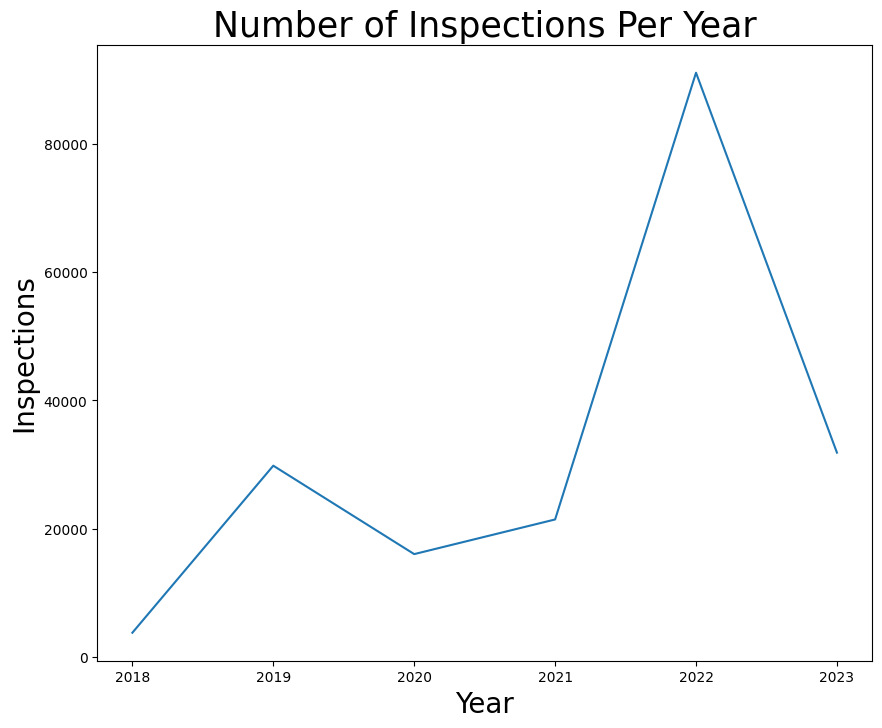

In [50]:

count_of_inspections_per_year = []

for year in range(2018, 2024):
    inspections = spark.sql(f"""
        SELECT count(*) as num
        FROM inspections
        WHERE `INSPECTION YEAR` = '{year}'
    """)
    count_of_inspections_per_year.append(inspections.select('num').collect()[0]['num'])
print(count_of_inspections_per_year)
# plot the number of new restaurants

plt.figure(figsize=(10,8))

plt.plot(range(2018, 2024), count_of_inspections_per_year)
plt.title('Number of Inspections Per Year', fontsize = 25)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Inspections',fontsize = 20)

file_name = "count_of_inspections_per_year.png"

plt.savefig(os.path.join(results_dir, file_name))

plt.show()




Clearly there was huge increase in number of total recorded inspections in 2022 when all restarurants were reopened as compared to 2019 before the pandemic. Now lets find number of unique restaurants that were inspected for all years greater than 2017.

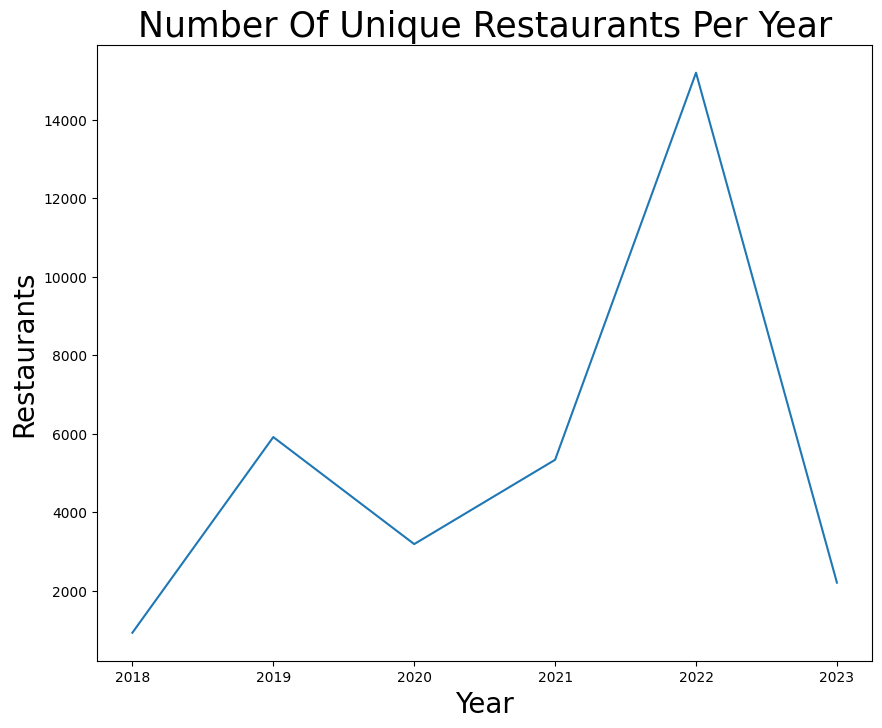

In [51]:

unique_restaurants = []
for year in range(2018, 2024):
    restaurants_year = spark.sql(f"""
        SELECT distinct(CAMIS)
        FROM inspections
        WHERE `INSPECTION YEAR` = '{year}'
    """)
    if year == 2018:
        unique_restaurants.append(restaurants_year.count())
    else:
        restaurants_prev_year = spark.sql(f"""
            SELECT distinct(CAMIS)
            FROM inspections
            WHERE `INSPECTION YEAR` = '{year-1}'
        """)
        unique_restaurants.append(restaurants_year.subtract(restaurants_prev_year).count())

# plot the number of new restaurants

plt.figure(figsize=(10,8))

plt.plot(range(2018, 2024), unique_restaurants)
plt.title('Number Of Unique Restaurants Per Year',fontsize = 25)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Restaurants',fontsize = 20)

file_name = "unique_restaurants_per_year.png"
plt.savefig(os.path.join(results_dir, file_name))

plt.show()


The two graphs indicate that after  many new restaruants were being inspected after covid, increasing the total count for inspections. Now lets find the the number of total inspections by cuisine description for the years 2019 and 2022. As these two years have the best data to compare before and after the pandemic and see if there are any differences. 

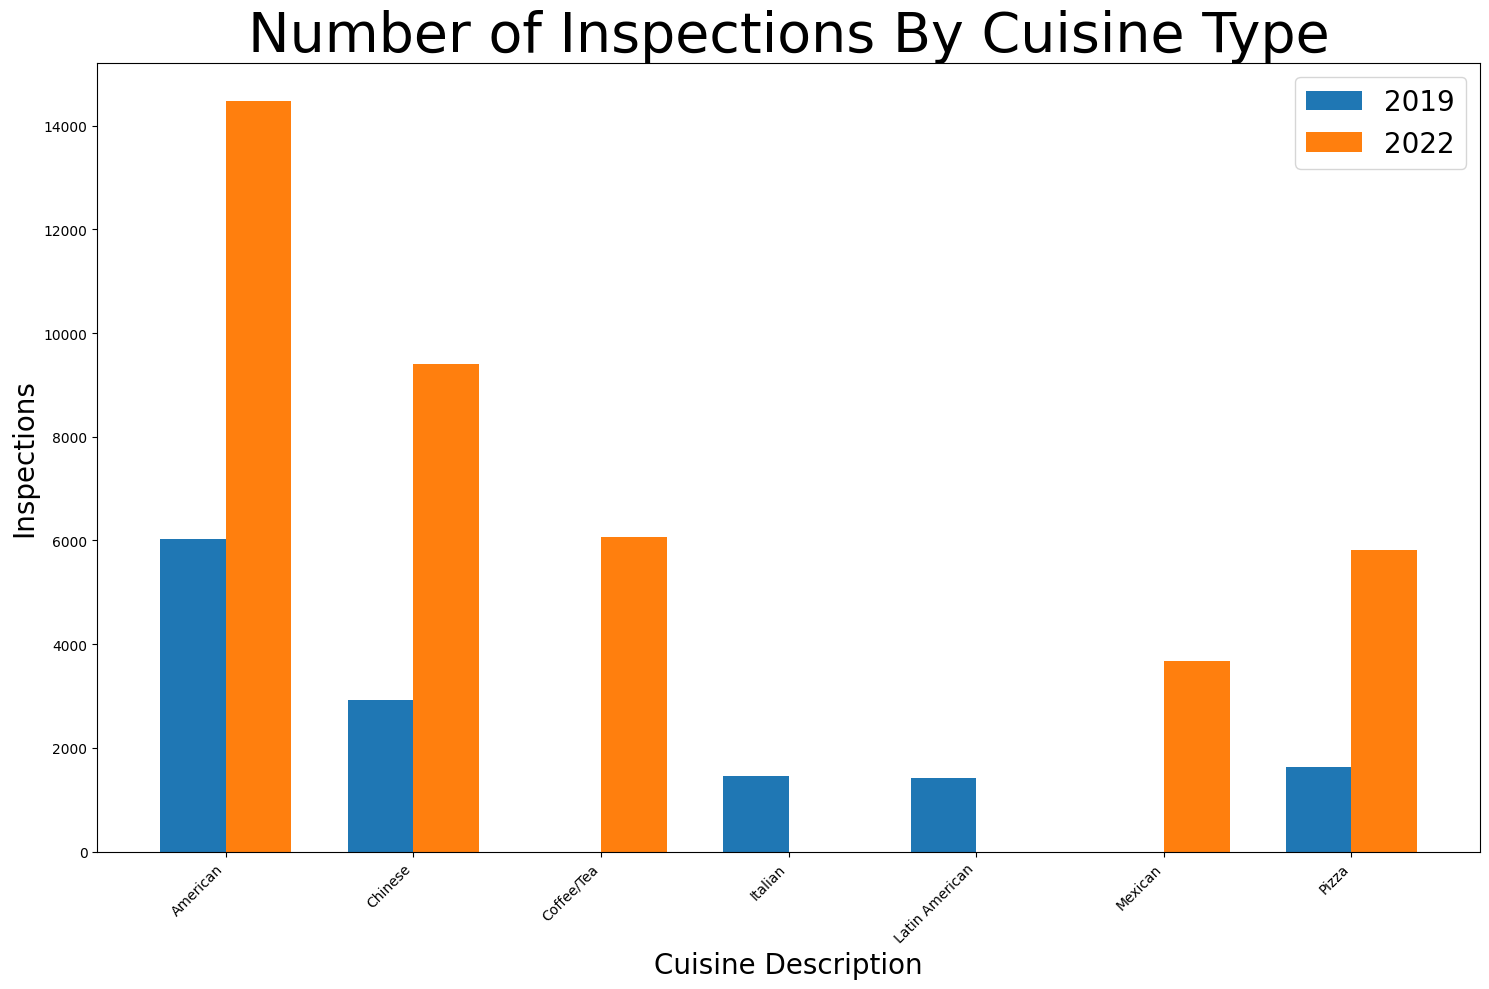

In [52]:

inspections_2019 = spark.sql("""
    SELECT `CUISINE DESCRIPTION`, COUNT(*) as count
    FROM inspections
    WHERE `INSPECTION YEAR` = 2019
    GROUP BY `CUISINE DESCRIPTION`
    ORDER BY count DESC
    limit 5
""")
inspections_2019_pd = inspections_2019.toPandas()

inspections_2022 = spark.sql("""
    SELECT `CUISINE DESCRIPTION`, COUNT(*) as count
    FROM inspections
    WHERE `INSPECTION YEAR` = 2022
    GROUP BY `CUISINE DESCRIPTION`
    ORDER BY count DESC
    limit 5
""")
inspections_2022_pd = inspections_2022.toPandas()

# get the set of all cuisine descriptions for both years
cuisines_2019 = set(inspections_2019_pd['CUISINE DESCRIPTION'])
cuisines_2022 = set(inspections_2022_pd['CUISINE DESCRIPTION'])
all_cuisines = sorted(cuisines_2019.union(cuisines_2022))

# get the counts for each cuisine for both years
counts_2019 = [inspections_2019_pd[inspections_2019_pd['CUISINE DESCRIPTION'] == cuisine]['count'].iloc[0] if cuisine in cuisines_2019 else 0 for cuisine in all_cuisines]
counts_2022 = [inspections_2022_pd[inspections_2022_pd['CUISINE DESCRIPTION'] == cuisine]['count'].iloc[0] if cuisine in cuisines_2022 else 0 for cuisine in all_cuisines]

# plot the number of inspections for all cuisines in 2019 and 2022

fig, ax = plt.subplots(figsize=(15, 10))
width = 0.35
x = np.arange(len(all_cuisines))
ax.bar(x, counts_2019, width=width, label='2019')
ax.bar(x + width, counts_2022, width=width, label='2022')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(all_cuisines, rotation=45, ha='right')
ax.set_xlabel('Cuisine Description',fontsize = 20)
ax.set_ylabel('Inspections',fontsize = 20)
ax.set_title('Number of Inspections By Cuisine Type',fontsize = 40)
ax.legend(fontsize="20")
plt.tight_layout()

file_name = "Number_of_Inspections_By_Cuisine_Type.png"
plt.savefig(os.path.join(results_dir, file_name))
plt.show()


The grapgh above indicates we have some new cuisine types with overall more inspectoins in 2022 such as coffee/Tea and Mexican. Lets normalize the findings above and see the which have more inspections per number of restaurants for each of those years.

In [53]:
from pyspark.sql.functions import col, year

# create an empty dictionary to hold the results
results = {}
cuisines = ["American", "Chinese", "Coffee/Tea", "Italian", "Latin American", "Mexican", "Pizza"]

# loop through all unique cuisine types in the dataset
for cuisine in cuisines:
    # count the number of inspections for the current cuisine type in 2019 and 2022
    count_2019 = inspection_df.filter((col("CUISINE DESCRIPTION") == cuisine) & (year(col("INSPECTION DATE")) == 2019)).count()
    count_2022 = inspection_df.filter((col("CUISINE DESCRIPTION") == cuisine) & (year(col("INSPECTION DATE")) == 2022)).count()

    # count the number of unique restaurants for the current cuisine type in 2019 and 2022
    unique_restaurants_2019 = inspection_df.filter((col("CUISINE DESCRIPTION") == cuisine) & (year(col("INSPECTION DATE")) == 2019)).agg(countDistinct('CAMIS')).collect()[0][0]
    unique_restaurants_2022 = inspection_df.filter((col("CUISINE DESCRIPTION") == cuisine) & (year(col("INSPECTION DATE")) == 2022)).agg(countDistinct('CAMIS')).collect()[0][0]

    # calculate the inspections per restaurant for the current cuisine type in 2019 and 2022
    inspections_per_restaurant_2019 = count_2019 / unique_restaurants_2019 if unique_restaurants_2019 != 0 else 0
    inspections_per_restaurant_2022 = count_2022 / unique_restaurants_2022 if unique_restaurants_2022 != 0 else 0

    # calculate the percentage increase from 2019 to 2022
    if inspections_per_restaurant_2019 != 0:
        pct_increase = (inspections_per_restaurant_2022 - inspections_per_restaurant_2019) / inspections_per_restaurant_2019 * 100

        # add the result to the dictionary
        results[cuisine] = pct_increase

# print the results
for cuisine, pct_increase in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{cuisine}: {pct_increase:.2f}% increase from 2019 to 2022")


Coffee/Tea: 17.03% increase from 2019 to 2022
Chinese: 9.47% increase from 2019 to 2022
Pizza: 7.41% increase from 2019 to 2022
American: 3.66% increase from 2019 to 2022
Mexican: -5.83% increase from 2019 to 2022
Latin American: -6.64% increase from 2019 to 2022
Italian: -16.11% increase from 2019 to 2022


Based on the findings above we can see that Coffee/tea and Chinese had the highest increase in inpections per prestaurant count from 2019 to 2022. Lets take a closer look at those two. 

First I want to see if people working from home affected the number of unique coffee restaurants once the pandamic started. Lets see the change in unique restaurants between coffee and all other cuisine types.

In [54]:
unique_coffee_shops = spark.sql(""" 
SELECT COUNT(DISTINCT CAMIS) AS count, YEAR(`INSPECTION DATE`) AS year
FROM inspections
WHERE `CUISINE DESCRIPTION` = 'Coffee/Tea' AND YEAR(`INSPECTION DATE`) BETWEEN 2018 AND 2022
GROUP BY YEAR(`INSPECTION DATE`)
ORDER BY year ASC

""")

# convert the Spark DataFrame to a Pandas DataFrame
unique_coffee_shops_pd = unique_coffee_shops.toPandas()

# calculate the percentage change between consecutive years
percent_change = unique_coffee_shops_pd['count'].pct_change()

# add the percentage change as a new column to the DataFrame
unique_coffee_shops_pd['percent_change'] = percent_change

# print the resulting DataFrame
print(unique_coffee_shops_pd)


   count  year  percent_change
0     25  2018             NaN
1    407  2019       15.280000
2    258  2020       -0.366093
3    561  2021        1.174419
4   1546  2022        1.755793


In [55]:
unique_not_coffee_shops = spark.sql(""" 
SELECT COUNT(DISTINCT CAMIS) AS count, YEAR(`INSPECTION DATE`) AS year
FROM inspections
WHERE `CUISINE DESCRIPTION` != 'Coffee/Tea' AND YEAR(`INSPECTION DATE`) BETWEEN 2018 AND 2022
GROUP BY YEAR(`INSPECTION DATE`)
ORDER BY year ASC

""")

# convert the Spark DataFrame to a Pandas DataFrame
unique_not_coffee_shops_pd = unique_not_coffee_shops.toPandas()

# calculate the percentage change between consecutive years
percent_change = unique_not_coffee_shops_pd['count'].pct_change()

# add the percentage change as a new column to the DataFrame
unique_not_coffee_shops_pd['percent_change'] = percent_change

# print the resulting DataFrame
print(unique_not_coffee_shops_pd)


   count  year  percent_change
0    904  2018             NaN
1   6330  2019        6.002212
2   4535  2020       -0.283570
3   5211  2021        0.149063
4  18325  2022        2.516600


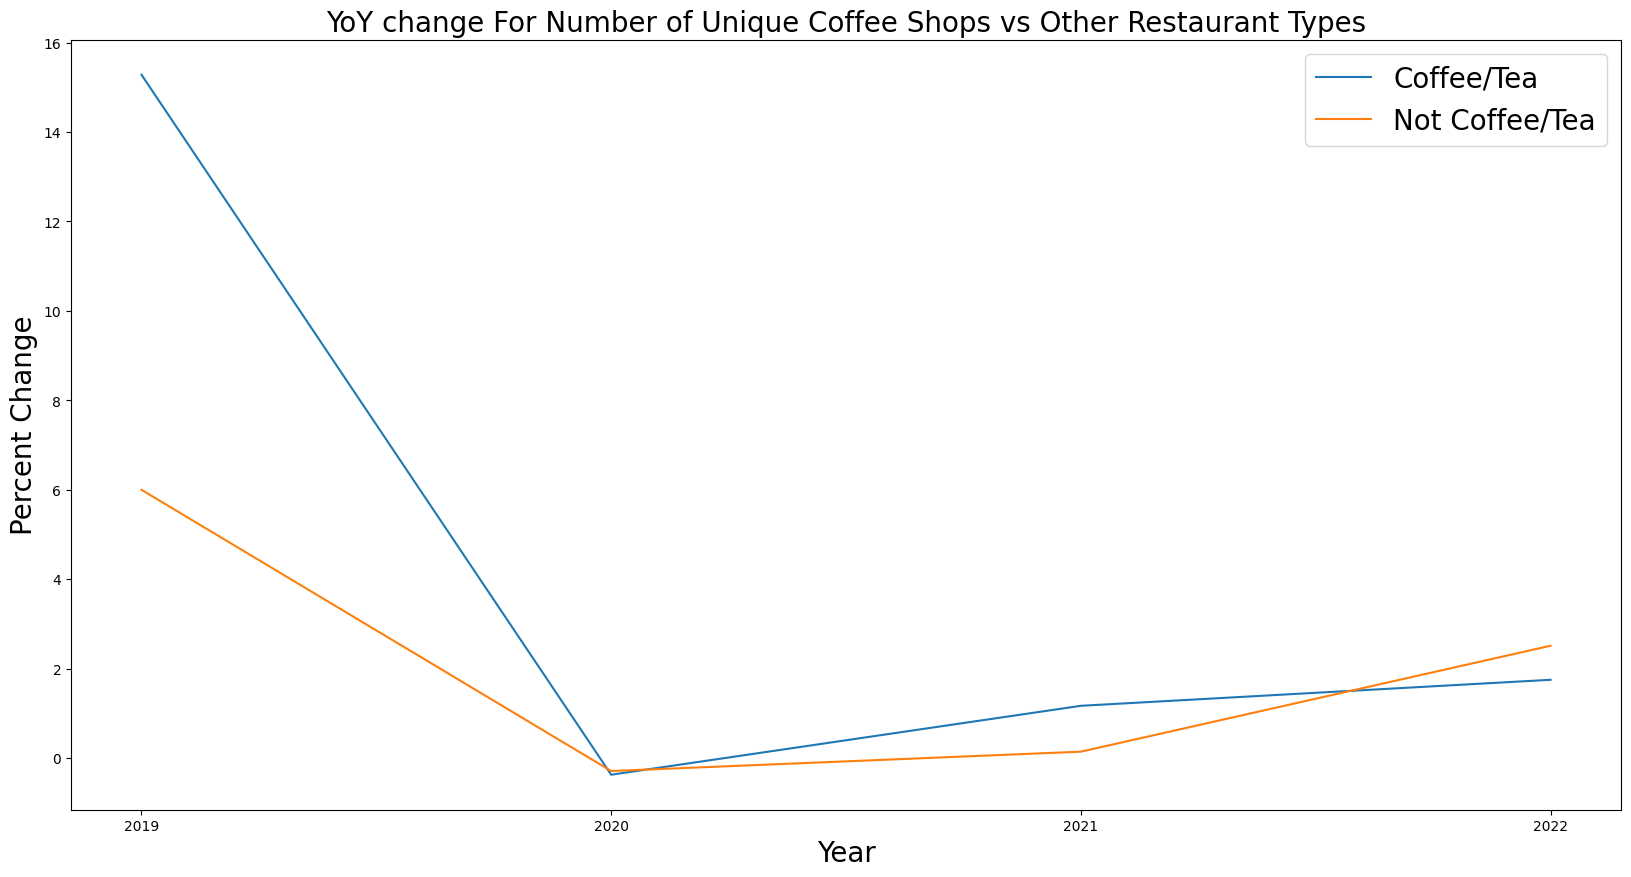

In [56]:
# plot the percent change for unique coffee shops and non-coffee shops
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(unique_coffee_shops_pd['year'].to_numpy(), unique_coffee_shops_pd['percent_change'].to_numpy(), label='Coffee/Tea')
ax.plot(unique_not_coffee_shops_pd['year'].to_numpy(), unique_not_coffee_shops_pd['percent_change'].to_numpy(), label='Not Coffee/Tea')
ax.set_xticks(range(2019, 2023))
ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Percent Change', fontsize = 20)
ax.set_title('YoY change For Number of Unique Coffee Shops vs Other Restaurant Types', fontsize =20)
ax.legend(fontsize="20")

file_name = "percent_change_for_unique_coffee_shops.png"
plt.savefig(os.path.join(results_dir, file_name))

plt.show()


Based on our findings we can see that the number of unique Coffee/Tea restaurants decreased by 36% from 2019 to 2022 as compared to all other cuisine types which decreased by 28%. Further the increase from 2021 to 2022 was far fewer compared to other cuisine types.

Now lets take a look at chinese restauarants and compare the inspections to see if the pandameic caused the inspections on chinese restaurants to increease. 

Lets find the increase of inspection of chinese and asian restaruants from 2019 to 2022 comprared to american and all other cuisine types. 

In [57]:
from pyspark.sql.functions import col, year

# Count the number of inspections for Asian/Asian Fusion and Chinese cuisine types in 2019 and 2022
asian_chinese_counts_2019 = inspection_df.filter((col("CUISINE DESCRIPTION").isin(['Asian/Asian Fusion', 'Chinese'])) & (year(col("INSPECTION DATE")) == 2019)).count()
asian_chinese_counts_2022 = inspection_df.filter((col("CUISINE DESCRIPTION").isin(['Asian/Asian Fusion', 'Chinese'])) & (year(col("INSPECTION DATE")) == 2022)).count()
# Calculate the percentage increase for Asian/Asian Fusion and Chinese cuisine types
asian_chinese_pct_increase = (asian_chinese_counts_2022 - asian_chinese_counts_2019) / asian_chinese_counts_2019 * 100



# Count the number of inspections for American cuisine types in 2019 and 2022
american_counts_2019 = inspection_df.filter((col("CUISINE DESCRIPTION") == "American") & (year(col("INSPECTION DATE")) == 2019)).count()
american_counts_2022 = inspection_df.filter((col("CUISINE DESCRIPTION") == "American") & (year(col("INSPECTION DATE")) == 2022)).count()
# Calculate the percentage increase for American cuisine types
american_pct_increase = (american_counts_2022 - american_counts_2019) / american_counts_2019 * 100


# Count the number of inspections for all other cuisine types in 2019 and 2022
other_cuisine_counts_2019 = inspection_df.filter(~col("CUISINE DESCRIPTION").isin(['Asian/Asian Fusion', 'Chinese']) & (year(col("INSPECTION DATE")) == 2019)).count()
other_cuisine_counts_2022 = inspection_df.filter(~col("CUISINE DESCRIPTION").isin(['Asian/Asian Fusion', 'Chinese']) & (year(col("INSPECTION DATE")) == 2022)).count()
# Calculate the percentage increase for all other cuisine types
other_cuisine_pct_increase = (other_cuisine_counts_2022 - other_cuisine_counts_2019) / other_cuisine_counts_2019 * 100

# Print the results
print(f"Percentage increase for Asian/Asian Fusion and Chinese cuisine types: {asian_chinese_pct_increase:.2f}%")
print(f"Percentage increase for American cuisine types: {american_pct_increase:.2f}%")
print(f"Percentage increase for all other cuisine types: {other_cuisine_pct_increase:.2f}%")


Percentage increase for Asian/Asian Fusion and Chinese cuisine types: 232.79%
Percentage increase for American cuisine types: 140.44%
Percentage increase for all other cuisine types: 202.08%


Display the findings on a graph

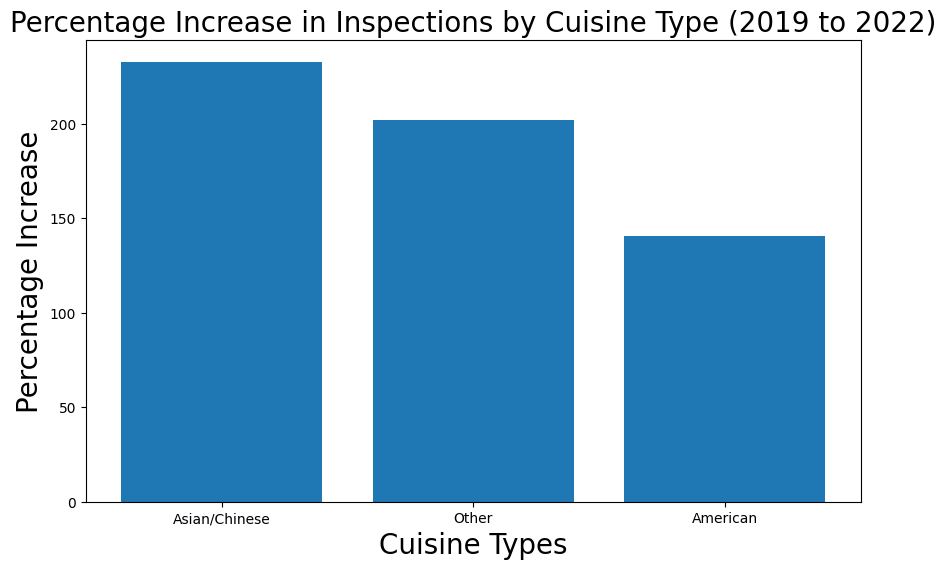

In [58]:

# Define the data
cuisine_types = ['Asian/Chinese', 'Other','American']
pct_increases = [asian_chinese_pct_increase, other_cuisine_pct_increase,american_pct_increase ,]

plt.figure(figsize=(10,6))
plt.bar(cuisine_types, pct_increases)

plt.xlabel('Cuisine Types', fontsize = 20)
plt.ylabel('Percentage Increase',fontsize = 20)
plt.title('Percentage Increase in Inspections by Cuisine Type (2019 to 2022)', fontsize = 20)


file_name = "Percentage_Increase_in_Inspections_by_Cuisine_Type.png"
plt.savefig(os.path.join(results_dir, file_name))

plt.show()


The Graph above clearly shows that Chinese restaurants has a high increase in inspections from 2019 to 2022 compared to the average inccrease amongst all restaurants and particulary American restaurants.

Now lets see if new violation types were introduced after the pandamic. 

In [59]:
# get set of violation codes for inspections before 2020
before_2020_violations = inspection_df.filter(year(col("INSPECTION DATE")) < 2020) \
    .select("VIOLATION CODE").distinct()

# get set of violation codes for inspections in 2020 and after
after_2020_violations = inspection_df.filter(year(col("INSPECTION DATE")) >= 2020) \
    .select("VIOLATION CODE").distinct()

# get set difference of violation codes between 2020 and after and before 2020
new_violations = after_2020_violations.subtract(before_2020_violations)

new_violations_list = (new_violations.select('VIOLATION CODE').
      rdd.flatMap(lambda x: x).collect())


new_violations_count = inspection_df.filter(col("VIOLATION CODE").isin(new_violations_list)) \
    .groupBy("VIOLATION CODE").count() \
    .orderBy(col("count").desc())

new_violations_count.show(10)



+--------------+-----+
|VIOLATION CODE|count|
+--------------+-----+
|         20-04|  550|
|         20-06|  460|
|           09E|  331|
|         20-01|  290|
|         28-06|  256|
|         20-08|  190|
|         19-10|  133|
|         19-06|  123|
|         28-01|  117|
|         16-02|  111|
+--------------+-----+
only showing top 10 rows



After reading the description of the codes above on https://www.nyc.gov/assets/doh/downloads/pdf/about/healthcode/health-code-chapter23.pdf we can conclude that there were a lot more different violations that were previously not given by inspectors indicating that inspections could have got more strict.

20-04 -Alcohol use during pregnancy sign not posted*** 
20-06 -Grade card not posted after reopening when FSE ordered closed by BFSCS
09E - Wash hands sign not posted
20-01-Allergy poster not posted or not in correct location
28-06-Contract with pest management professional, record of pest exterminations, activities not kept on premises
20-08-Failure to post or conspicuously post healthyeating information***
19-10- Failure to display required signage about plastic straw availability
19-06- Providing single-use, non-compostable plastic straws to customers without customer request 
28-01- Insufficient heat in commercial premises
16-02-Nutritional fact labels and/or ingredient label is not maintained on site



Check if certain violations were more prominent in 2022 than 2019

In [60]:
violations_2019 = spark.sql("""
    SELECT `VIOLATION CODE`, COUNT(*) as count
    FROM inspections
    WHERE `INSPECTION YEAR` = '2019'
    GROUP BY `VIOLATION CODE`
    ORDER BY count DESC
    LIMIT 5
""")

violations_2022 = spark.sql("""
    SELECT `VIOLATION CODE`, COUNT(*) as count
    FROM inspections
    WHERE `INSPECTION YEAR` = '2020'
    GROUP BY `VIOLATION CODE`
    ORDER BY count DESC
    LIMIT 5
""")

# convert the PySpark DataFrames to pandas DataFrames
violations_2019_pd = violations_2019.toPandas()
violations_2022_pd = violations_2022.toPandas()

# display the pandas DataFrames
print('Top 5 violations in 2019:\n', violations_2019_pd)
print('\nTop 5 violations in 2022:\n', violations_2022_pd)


Top 5 violations in 2019:
   VIOLATION CODE  count
0            10F   4504
1            08A   3329
2            06D   2193
3            04L   2002
4            04N   1758

Top 5 violations in 2022:
   VIOLATION CODE  count
0            10F   2565
1            08A   1666
2            04L   1237
3            06D   1187
4            06C    941


Based on the information above there is not much difference in the top violations which could indicate anything

Find TOP 3 MOST AMOUNT of inspections by ZIPCODE PER YEAR STARTING IN 2019 THEN GRAPH the change for each of those zip codes  

In [61]:
from pyspark.sql.functions import year

# filter inspections for 2019 and find top 3 zip codes
top_zips_2019 = inspection_df.filter(year(col("INSPECTION DATE")) == 2019) \
    .groupBy('ZIPCODE').count().orderBy('count', ascending=False).limit(3)

# filter inspections for 2022 and find top 3 zip codes
top_zips_2022 = inspection_df.filter(year(col("INSPECTION DATE")) == 2022) \
    .groupBy('ZIPCODE').count().orderBy('count', ascending=False).limit(3)

# show results
print("Top 3 zip codes for inspections in 2019:")
top_zips_2019.show()

print("Top 3 zip codes for inspections in 2022:")
top_zips_2022.show()


Top 3 zip codes for inspections in 2019:
+-------+-----+
|ZIPCODE|count|
+-------+-----+
|  10003|  755|
|  10019|  725|
|  10036|  680|
+-------+-----+

Top 3 zip codes for inspections in 2022:
+-------+-----+
|ZIPCODE|count|
+-------+-----+
|  10013| 2282|
|  10003| 2098|
|  10019| 1914|
+-------+-----+



We can see with the data above that there was a change in top 3 with the highest changing to 10013. Lets map the zipcodes to their respective neighborhood and plot the top 3 for each year. 

<ipython-input-62-31d512a17699>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([zip_to_neighborhood.get(str(zip_code), 'Unknown') for zip_code in data_2019['ZIPCODE']])


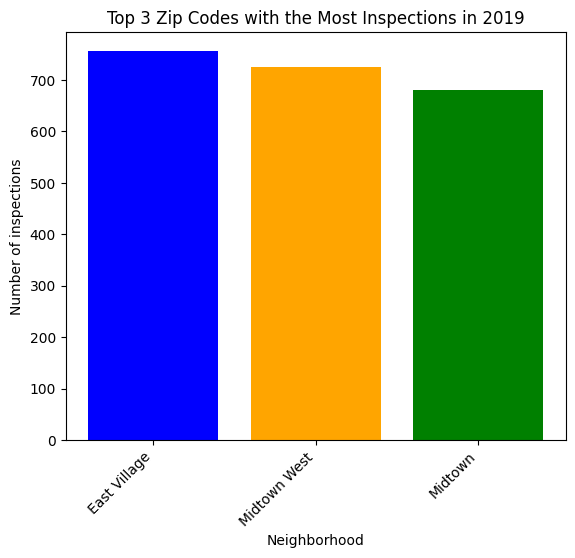

<ipython-input-62-31d512a17699>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([zip_to_neighborhood.get(str(zip_code), 'Unknown') for zip_code in data_2022['ZIPCODE']])


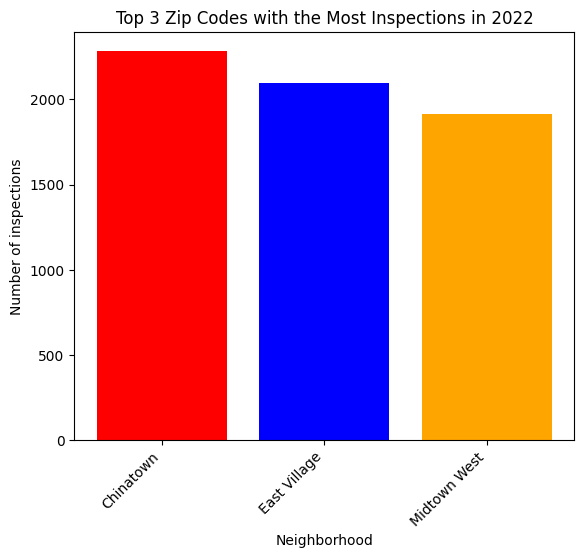

In [62]:
#conver to pandas
data_2019 = top_zips_2019.toPandas()
data_2022 = top_zips_2022.toPandas()

# create a dictionary mapping zip codes to neighborhoods
zip_to_neighborhood = {
    '10003': 'East Village',
    '10013': 'Chinatown',
    '10019': 'Midtown West',
    '10036': 'Midtown',
    '10002': 'Lower East Side'
}



# create the bar chart for 2019
fig, ax = plt.subplots(figsize = (10,6))

colors = ['blue', 'orange', 'green']

ax.bar([zip_to_neighborhood.get(str(zip_code), 'Unknown') for zip_code in data_2019['ZIPCODE']], data_2019['count'], color=colors)

ax.set_xlabel('Neighborhood')
ax.set_ylabel('Number of inspections')
ax.set_title('Top 3 Zip Codes with the Most Inspections in 2019')

ax.set_xticklabels([zip_to_neighborhood.get(str(zip_code), 'Unknown') for zip_code in data_2019['ZIPCODE']])

plt.subplots_adjust(left=0.4, bottom=0.2)

plt.xticks(rotation=45, ha='right')
file_name = "Top_3_Zip_Codes_2019.png"
plt.savefig(os.path.join(results_dir, file_name))
plt.show()




#create the bar chart for 2022
colors = ['red', 'blue', 'orange']

fig, ax = plt.subplots(figsize = (10,6))
ax.bar([zip_to_neighborhood.get(str(zip_code), 'Unknown') for zip_code in data_2022['ZIPCODE']], data_2022['count'], color=colors)

ax.set_xlabel('Neighborhood')
ax.set_ylabel('Number of inspections')
ax.set_title('Top 3 Zip Codes with the Most Inspections in 2022')

# set the x-axis tick labels to the neighborhood names
ax.set_xticklabels([zip_to_neighborhood.get(str(zip_code), 'Unknown') for zip_code in data_2022['ZIPCODE']])

plt.subplots_adjust(left=0.4, bottom=0.2)
plt.xticks(rotation=45, ha='right')
file_name = "Top_3_Zip_Codes_2022.png"
plt.savefig(os.path.join(results_dir, file_name))
plt.show()


Moving forward with the EDA, lets determine if the inspections became more strict. The first method we can use is to compare the number of restaraunts that of which have closed due to the inspections failing.

Lets use the action column to compare when ACTION includes "CLOSED" 

In [63]:
# filter inspections for closed restaurants in 2019
closed_2019 = inspection_df.filter("YEAR(`INSPECTION DATE`) == 2019 AND (`Action` == 'Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.' OR `Action` == 'Establishment re-closed by DOHMH.')")
closed_2019_count = closed_2019.count()

# filter inspections for closed restaurants in 2022
closed_2022 = inspection_df.filter("YEAR(`INSPECTION DATE`) == 2022 AND (`Action` == 'Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.' OR `Action` == 'Establishment re-closed by DOHMH.')")
closed_2022_count = closed_2022.count()

# calculate the percentage increase
closed_increase = ((closed_2022_count - closed_2019_count) / closed_2019_count) * 100

# print the counts for each year and the percentage increase
print(f"Number of closed restaurants in 2019: {closed_2019_count}")
print(f"Number of closed restaurants in 2022: {closed_2022_count}")
print(f"Percentage increase: {closed_increase:.2f}%")


Number of closed restaurants in 2019: 999
Number of closed restaurants in 2022: 3734
Percentage increase: 273.77%


FIND PERCENT CHANGE IN CRIITCAL FLAG = Critical 

In [64]:


critical_2019 = inspection_df.filter("YEAR(`INSPECTION DATE`) == 2019 AND `CRITICAL FLAG` == 'Critical'")
critical_2019_count = critical_2019.count()

# filter inspections for closed restaurants in 2022
critical_2022 = inspection_df.filter("YEAR(`INSPECTION DATE`) == 2022 AND `CRITICAL FLAG` == 'Critical'")
critical_2022_count = critical_2022.count()

critical_flag_increase = ((critical_2022_count -critical_2019_count) / critical_2019_count) *100

# print the counts for each year
print(f"Number of Critical Flags in 2019: {critical_2019_count}")
print(f"Number of Critical Flags in 2022: {critical_2022_count}")
print(f"Perecnt increase: {critical_flag_increase:.2f}%")

Number of Critical Flags in 2019: 16254
Number of Critical Flags in 2022: 51099
Perecnt increase: 214.38%


Count number of unique restaurants for 2019 AND 2022

In [65]:
# count number of unique restaurants for 2019
unique_restaurants_2019 = inspection_df.filter(inspection_df['INSPECTION DATE'].contains('2019')) \
                                        .agg(countDistinct('CAMIS')).collect()[0][0]
print("Number of unique restaurants in 2019:", unique_restaurants_2019)

# count number of unique restaurants for 2022
unique_restaurants_2022 = inspection_df.filter(inspection_df['INSPECTION DATE'].contains('2022')) \
                                        .agg(countDistinct('CAMIS')).collect()[0][0]
print("Number of unique restaurants in 2022:", unique_restaurants_2022)


unique_increase = ((unique_restaurants_2022 - unique_restaurants_2019) / unique_restaurants_2019) * 100
print(f"Percent Icncrease: {unique_increase:.2f}%")

Number of unique restaurants in 2019: 6737
Number of unique restaurants in 2022: 19871
Percent Icncrease: 194.95%


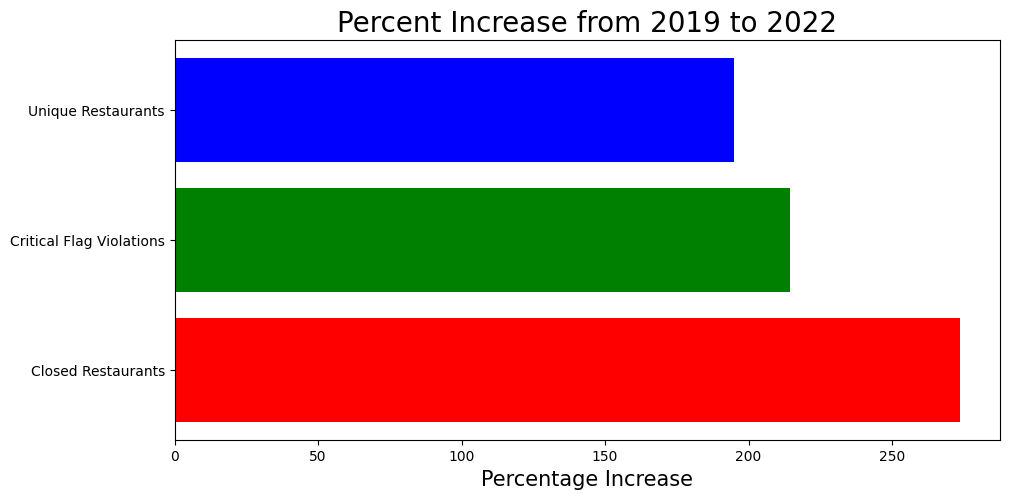

In [66]:


# create the bar chart
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(['Closed Restaurants', 'Critical Flag Violations', 'Unique Restaurants'], 
        [closed_increase, critical_flag_increase, unique_increase], 
        color=['red', 'green', 'blue'])

ax.set_xlabel('Percentage Increase', fontsize=15)
ax.set_title('Percent Increase from 2019 to 2022', fontsize=20)

plt.subplots_adjust(left=0.4, bottom=0.5, right=0.95, top=0.9)


file_name = "Percent_Increase_Closed.png"
plt.savefig(os.path.join(results_dir, file_name))
plt.show()





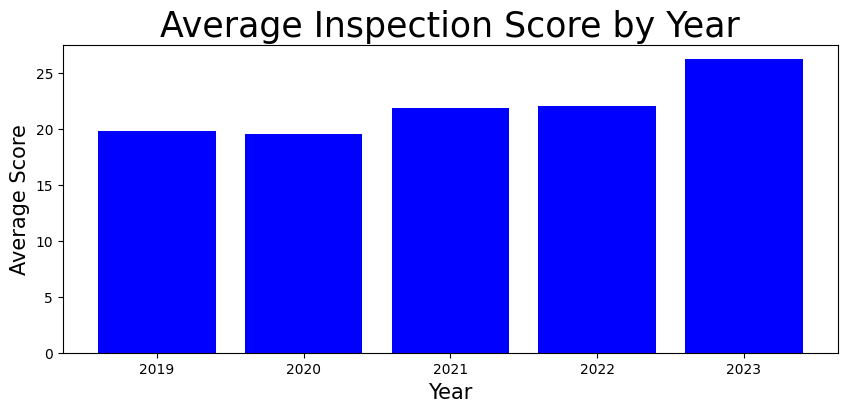

In [67]:

# get the average score for each year after 2018
avg_scores = spark.sql('''
    SELECT YEAR(`INSPECTION DATE`) AS Year, ROUND(AVG(`SCORE`), 2) AS Avg_Score
    FROM inspections
    WHERE YEAR(`INSPECTION DATE`) >= 2019
    GROUP BY Year
    ORDER BY Year ASC
''')

# convert to pandas dataframe
avg_scores_pd = avg_scores.toPandas()

# create the bar chart
fig, ax = plt.subplots(figsize = (10,4))
ax.bar(avg_scores_pd['Year'], avg_scores_pd['Avg_Score'], color='blue')


ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Average Score', fontsize = 15)
ax.set_title('Average Inspection Score by Year', fontsize = 25)

file_name = "Average_Inspection_Score_by_Year.png"
plt.savefig(os.path.join(results_dir, file_name))
plt.show()


The graph indicates that the avg score per inspection is increasing each year after 2020. This can point to the possssibilty that the inspections are indeed more stricter after the pandemic. 

Now check if Chinese restaurants in particular had more scrutiny than other restaurants in terms of the avg score from 2019 to 2022. 

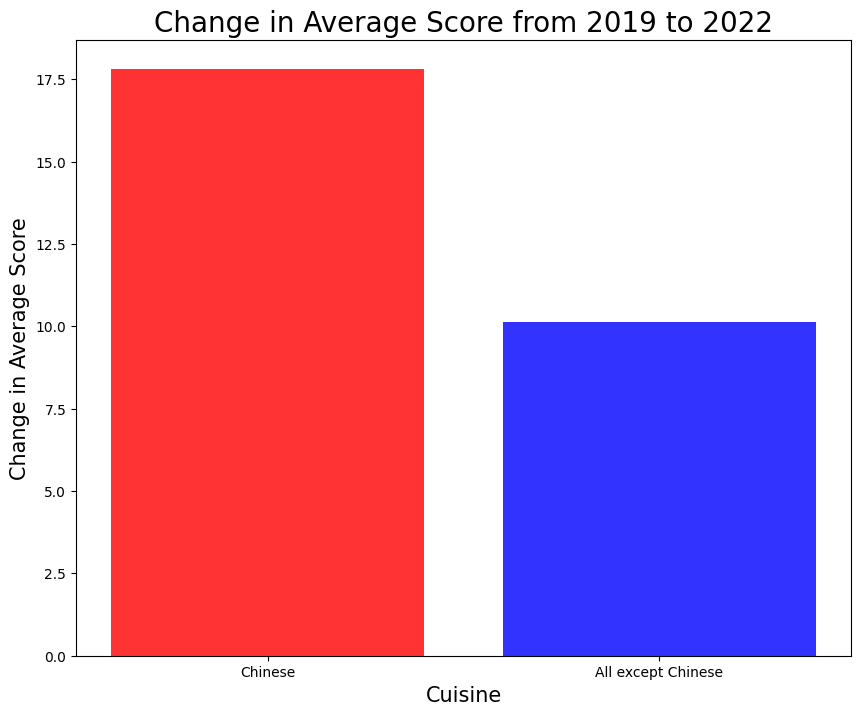

In [68]:
from pyspark.sql.functions import col, year

# calculate average score for Chinese restaurants in 2019
chinese_2019 = inspection_df.filter((col("CUISINE DESCRIPTION") == "Chinese") & (year(col("INSPECTION DATE")) == 2019))
chinese_2019_avg = chinese_2019.agg(avg(col("SCORE")).alias("avg_score")).collect()[0]["avg_score"]

# calculate average score for Chinese restaurants in 2022
chinese_2022 = inspection_df.filter((col("CUISINE DESCRIPTION") == "Chinese") & (year(col("INSPECTION DATE")) == 2022))
chinese_2022_avg = chinese_2022.agg(avg(col("SCORE")).alias("avg_score")).collect()[0]["avg_score"]

# calculate average score for all restaurants except Chinese in 2019 and 2022
all_2019 = inspection_df.filter((~col("CUISINE DESCRIPTION").isin(["Chinese"])) & (year(col("INSPECTION DATE")) == 2019))
all_2022 = inspection_df.filter((~col("CUISINE DESCRIPTION").isin(["Chinese"])) & (year(col("INSPECTION DATE")) == 2022))
all_2019_avg = all_2019.agg(avg(col("SCORE")).alias("avg_score")).collect()[0]["avg_score"]
all_2022_avg = all_2022.agg(avg(col("SCORE")).alias("avg_score")).collect()[0]["avg_score"]

# calculate percent change in average score for Chinese restaurants from 2019 to 2022
chinese_change = ((chinese_2022_avg - chinese_2019_avg) / chinese_2019_avg) * 100

# calculate percent change in average score for all restaurants except Chinese from 2019 to 2022
all_other_change = ((all_2022_avg - all_2019_avg) / all_2019_avg) * 100

# plot the results
# create the bar chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(['Chinese', 'All except Chinese'], [chinese_change, all_other_change], color=['red', 'blue'], alpha=0.8)

# add labels and title
ax.set_xlabel('Cuisine', fontsize=15)
ax.set_ylabel('Change in Average Score', fontsize=15)
ax.set_title('Change in Average Score from 2019 to 2022', fontsize=20)

file_name = "Chinese_Vs_Other_score.png"
plt.savefig(os.path.join(results_dir, file_name))

# show the plot
plt.show()


In [69]:
end_time = time.time()
print("time taken: %.4f seconds" %(end_time - start_time))

time taken: 1195.5564 seconds
